# 상관분석
- 금,은,달러의 상관성 분석
- 설치 : pip install openpyxl


In [26]:
import pandas as pd


In [27]:
df = pd.read_excel("datas2/일별_금은달러.xlsx")

In [28]:
df.head()

,일자,금값,은값,달러 환율
0,2020.08.07,78538.90,27.53,1188.5
1,2020.08.06,78009.22,28.39,1185.5
2,2020.08.05,77748.00,26.88,1188.0
3,2020.08.04,75873.57,26.01,1194.5
4,2020.08.03,75761.76,24.39,1195.7


In [29]:
#일자를 기준으로 데이터 정렬
df.sort_values(by = '일자', inplace = True)
# 같은 뜻 다른 표기
# df = df.sort_values(by = '일자')

In [30]:
df.head()

,일자,금값,은값,달러 환율
27,2020.06.30,68559.78,18.54,1203.0
26,2020.07.01,68941.28,18.13,1203.5
25,2020.07.02,68278.07,18.24,1199.0
24,2020.07.06,68269.27,18.50,1194.0
23,2020.07.07,68443.14,18.63,1197.0


In [31]:
# 그래프 기본 설정 
from matplotlib import pyplot as plt
import numpy as np

plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10, 8)

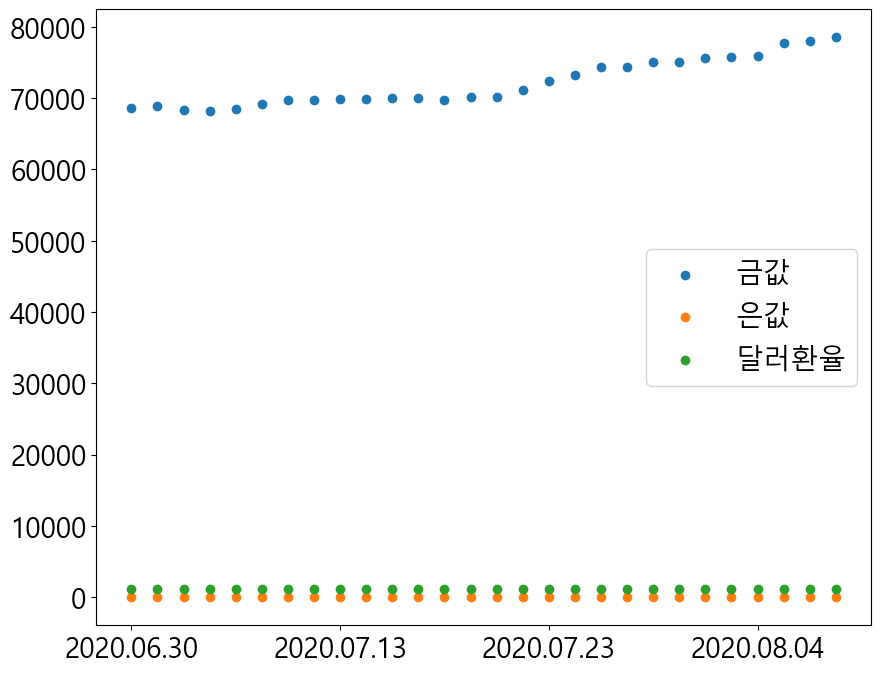

In [32]:
plt.scatter(df['일자'], df['금값'],label='금값')
plt.scatter(df['일자'], df['은값'], label='은값')
plt.scatter(df['일자'], df['달러 환율'], label='달러환율')
plt.xticks(df['일자'].iloc[::8])
plt.legend()
plt.show()

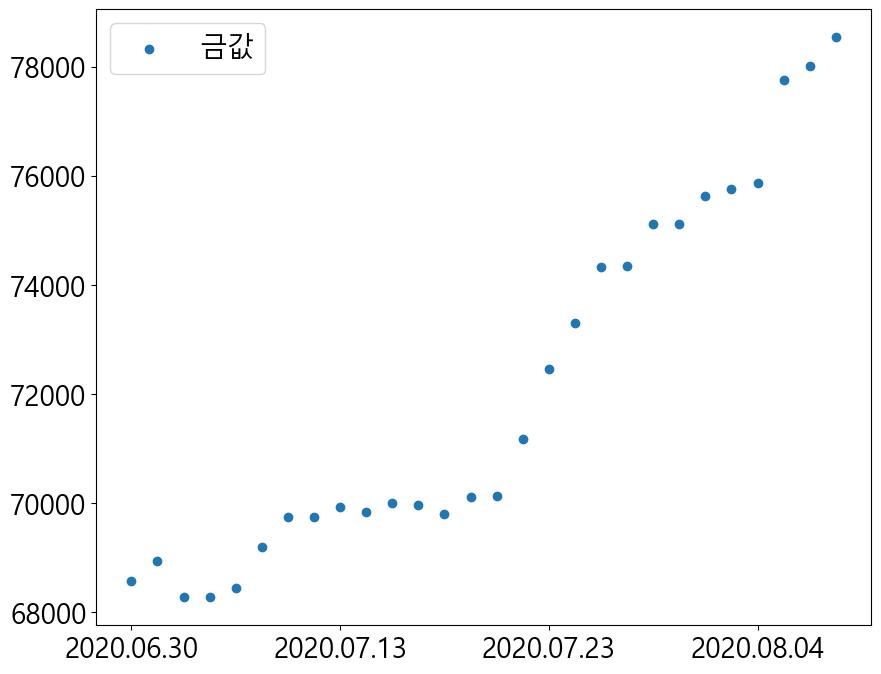

In [33]:
# 하나씩 주석처리하면서 보기! 
plt.scatter(df['일자'], df['금값'],label='금값')
#plt.scatter(df['일자'], df['은값'], label='은값')
#plt.scatter(df['일자'], df['달러 환율'], label='달러환율')
plt.xticks(df['일자'].iloc[::8])
plt.legend()
plt.show()

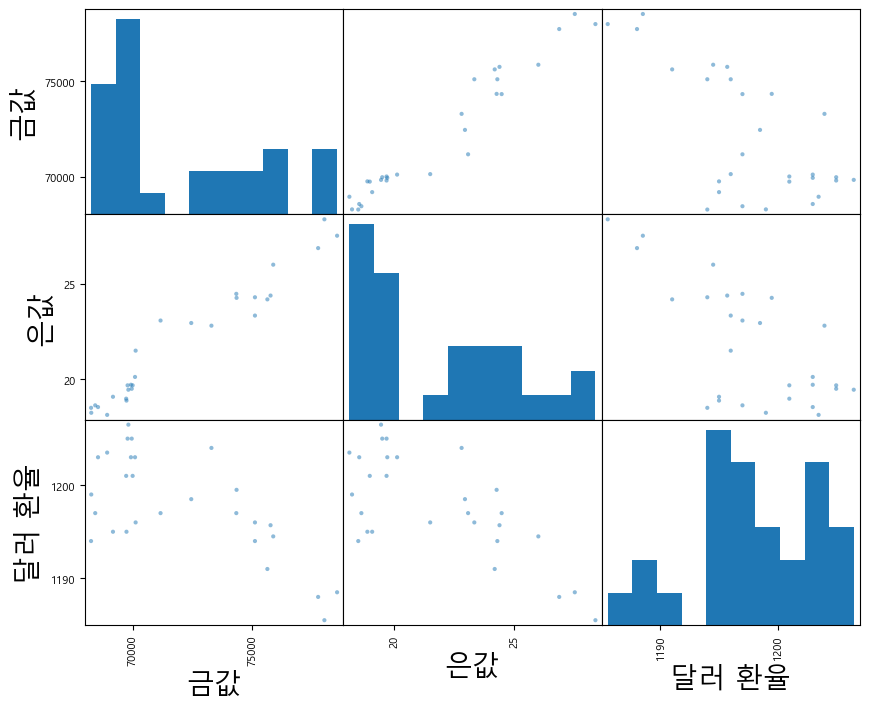

In [34]:
# scatter matrix
pd.plotting.scatter_matrix(df.drop("일자", axis = 1))
plt.show()

### 피어슨 상관계수

In [35]:
from scipy import stats
print(stats.pearsonr(df['금값'], df['은값']))
print(stats.pearsonr(df['금값'], df['달러 환율']))
print(stats.pearsonr(df['은값'], df['달러 환율']))

#해석
# - 금값, 은값 : 강력한 양의 상관관계
# - 금값, 달러 : 음의 상관관계 
# - 은값, 달러 : 음의 상관관계

PearsonRResult(statistic=np.float64(0.9718640116033498), pvalue=np.float64(7.508878356556173e-18))
PearsonRResult(statistic=np.float64(-0.6793266264341937), pvalue=np.float64(7.03332525845226e-05))
PearsonRResult(statistic=np.float64(-0.6954569556203559), pvalue=np.float64(3.989042061957992e-05))


- 피어슨 상관계수 보기 좋게 출력 

In [37]:
import itertools
from scipy.stats import pearsonr
target_columns = ["금값", "은값", "달러 환율"]
for col1, col2 in itertools.combinations(target_columns, 2):
    result = stats,pearsonr(df[col1], df[col2])
    print("{} ~ {}: coef:{}, p-value : {}".format(col1, col2, result[0], result[1]))

금값 ~ 은값: coef:<module 'scipy.stats' from 'c:\\Users\\Admin\\miniconda3\\envs\\eda_env\\lib\\site-packages\\scipy\\stats\\__init__.py'>, p-value : PearsonRResult(statistic=np.float64(0.9718640116033498), pvalue=np.float64(7.508878356556173e-18))
금값 ~ 달러 환율: coef:<module 'scipy.stats' from 'c:\\Users\\Admin\\miniconda3\\envs\\eda_env\\lib\\site-packages\\scipy\\stats\\__init__.py'>, p-value : PearsonRResult(statistic=np.float64(-0.6793266264341937), pvalue=np.float64(7.03332525845226e-05))
은값 ~ 달러 환율: coef:<module 'scipy.stats' from 'c:\\Users\\Admin\\miniconda3\\envs\\eda_env\\lib\\site-packages\\scipy\\stats\\__init__.py'>, p-value : PearsonRResult(statistic=np.float64(-0.6954569556203559), pvalue=np.float64(3.989042061957992e-05))


### 스피어만 상관계수

In [45]:
import itertools
target_columns = ["금값", "은값", "달러 환율"]
for col1, col2 in itertools.combinations(target_columns, 2):
    result = stats.spearmanr(df[col1], df[col2])
    print("{} ~ {}: coef:{}, p-value : {}".format(col1, col2, result[0], result[1]))

#해석
# 금과 은은 매우 강한 양의 상관관계
# 금/은과 환율은 유의미한 음의 상관관계

금값 ~ 은값: coef:0.9711235892228813, p-value : 1.0481280432981455e-17
금값 ~ 달러 환율: coef:-0.5039075855936102, p-value : 0.006257468267109452
은값 ~ 달러 환율: coef:-0.528106006718531, p-value : 0.003869997604824081


### 컬럼간 상관계수 계산

In [41]:
df.head()

,일자,금값,은값,달러 환율
27,2020.06.30,68559.78,18.54,1203.0
26,2020.07.01,68941.28,18.13,1203.5
25,2020.07.02,68278.07,18.24,1199.0
24,2020.07.06,68269.27,18.50,1194.0
23,2020.07.07,68443.14,18.63,1197.0


In [42]:
df.drop("일자", axis = 1).corr(method = "pearson")

,금값,은값,달러 환율
금값,1.000000,0.971864,-0.679327
은값,0.971864,1.000000,-0.695457
달러 환율,-0.679327,-0.695457,1.000000


In [43]:
df.drop("일자", axis = 1).corr(method = "spearman")

,금값,은값,달러 환율
금값,1.000000,0.971124,-0.503908
은값,0.971124,1.000000,-0.528106
달러 환율,-0.503908,-0.528106,1.000000
